In [1]:
%matplotlib notebook

# load dependencies
import json
import requests
from matplotlib import pyplot as plt
from scipy.stats import linregress
from pprint import pprint
import pandas as pd
import scipy.stats as st

In [2]:
# read in files
home_value = pd.read_csv('Resources/median_house_value.csv')
murders = pd.read_csv('Clean_Data_Output/Population_Data.csv')

# merge csv files
house_df = pd.merge(murders, home_value, on='State', how='outer')

# check the file has been read in
house_df

,Unnamed: 0,State,Population (2019),Total Murders (2019),Abbreviation,Average FICO Score,Median Home Value,Average Outstanding Mortgage Amount,Difference Between Value and Mortgage Balance,
0,0,Alabama,731545.0,4.0,AL,680,134300,141302,-7002,
1,1,Alaska,7278717.0,69.0,AK,707,326000,223167,102833,
2,2,Arizona,3017804.0,337.0,AZ,696,257600,202959,54641,
3,3,Arkansas,39512223.0,231.0,AR,683,129500,129383,117,
4,4,California,5758736.0,1679.0,CA,708,550800,363891,186909,
5,5,Colorado,3565287.0,209.0,CO,718,381300,259113,122187,
6,6,Connecticut,973764.0,104.0,CT,717,244800,224928,19872,
7,7,Delaware,705749.0,48.0,DE,701,236300,185527,50773,
8,8,District of Columbia,21477737.0,166.0,DC,703,567800,421499,146301,
9,9,Florida,10617423.0,1.0,FL,694,237900,188223,49677,


In [3]:
# clean dataframe with only the relevant data
house_df = house_df[['State', 'Abbreviation', 'Population (2019)', 'Median Home Value', 'Total Murders (2019)']]

# check dataframe for any errors
house_df.head()

,State,Abbreviation,Population (2019),Median Home Value,Total Murders (2019)
0,Alabama,AL,731545.0,134300,4.0
1,Alaska,AK,7278717.0,326000,69.0
2,Arizona,AZ,3017804.0,257600,337.0
3,Arkansas,AR,39512223.0,129500,231.0
4,California,CA,5758736.0,550800,1679.0


<IPython.core.display.Javascript object>


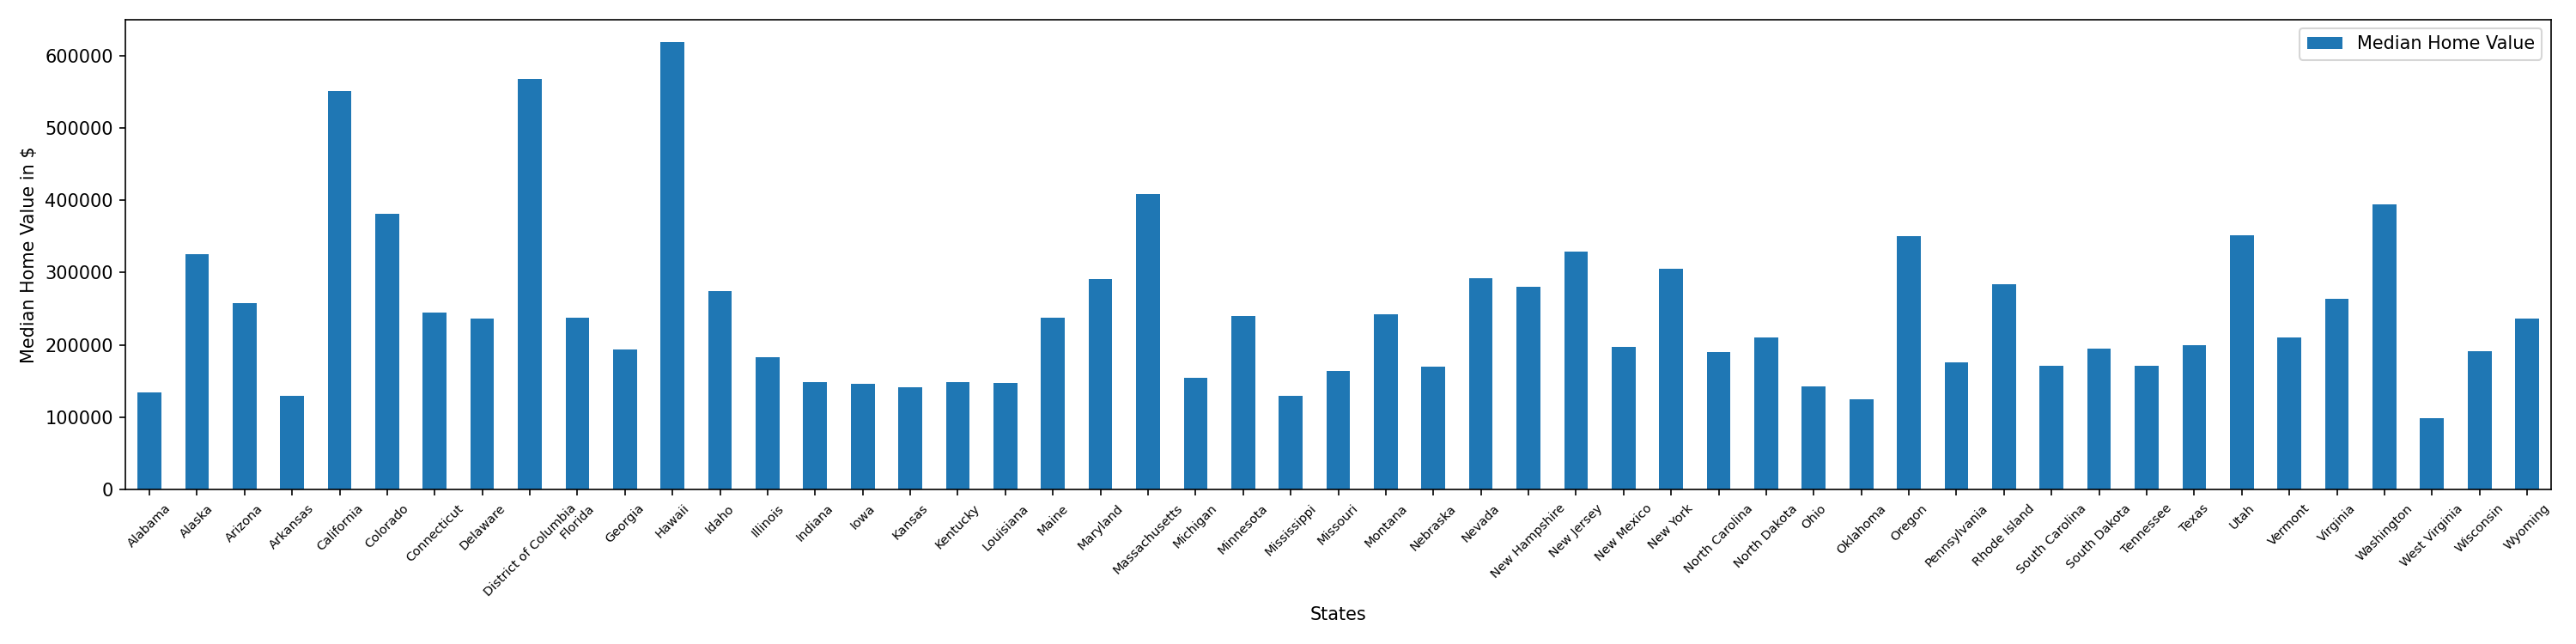

In [4]:
# create bar plot for median home value by state

# new dataframe with just state and home value
state_house_value = house_df[["State","Median Home Value"]]
state_house_value = state_house_value.set_index("State")

# create and format plot
state_house_value.plot(kind='bar',  figsize=(20,5))
plt.xlabel("States")
plt.ylabel("Median Home Value in $")
plt.xticks(rotation=45, fontsize=7)

# show plot
plt.show()
plt.tight_layout()

# save figure

plt.savefig('Image Output/house_value_by_state')

<IPython.core.display.Javascript object>


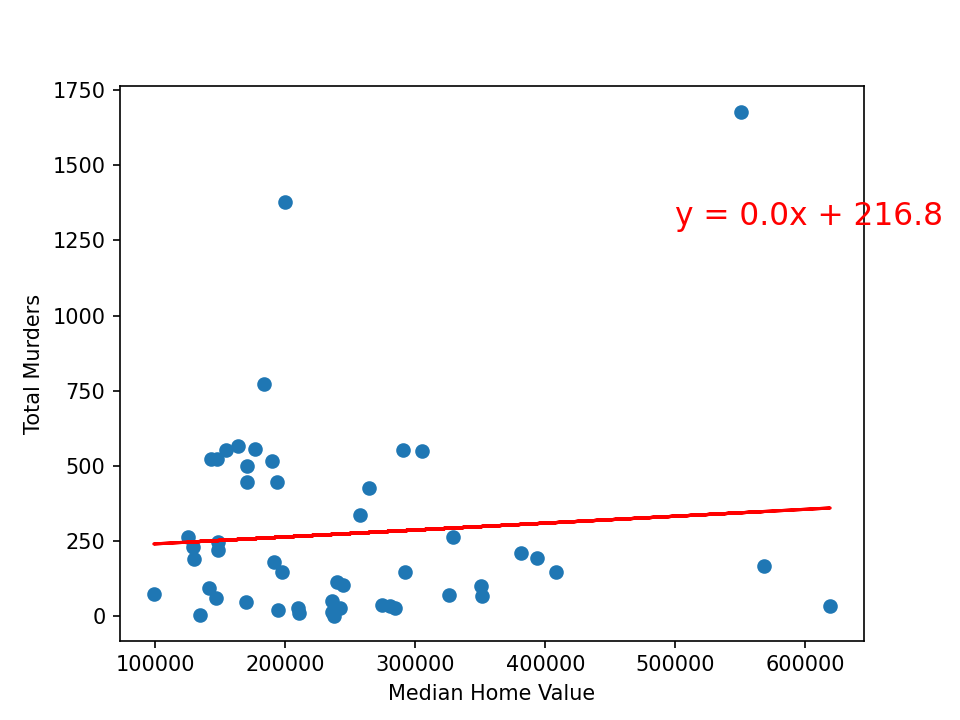

In [5]:
# create scatter plot for median home value and total murders

# create dataframe for just median home value and total murders
house_murder = house_df[["State","Median Home Value", "Total Murders (2019)"]]
house_murder  = house_murder.set_index("State")

# show plot
house_murder.plot(kind='scatter', x='Median Home Value', y='Total Murders (2019)')

# save fig as output

plt.savefig('Image Output/house_value_murder_scatter')


In [6]:
# plot lineregress
x_values = house_murder['Median Home Value']
y_values = house_murder['Total Murders (2019)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(500000,1300),fontsize=15,color="red")
plt.xlabel('Median Home Value')
plt.ylabel('Total Murders')

# print r-valaue and show plot
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save fig as output

plt.savefig('Image Output/house_value_vs_murder_regress')

The r-squared is: 0.00630380986703158


In [7]:
# create variables for plots

house_value = house_murder['Median Home Value']
total_murders = house_murder['Total Murders (2019)']
corr = st.pearsonr(house_value,total_murders)

In [8]:
print(f"The correlation coefficient between median home value and total murders is {round( (corr[0]),2)}")

The correlation coefficient between median home value and total murders is 0.08


In [11]:
# BONUS: Generate the correlation matrix and find the strongest positive and negative correlations

hm_corr = house_df.corr()
hm_corr.unstack().sort_values()

Population (2019)     Total Murders (2019)   -0.048834
Total Murders (2019)  Population (2019)      -0.048834
Population (2019)     Median Home Value       0.033981
Median Home Value     Population (2019)       0.033981
                      Total Murders (2019)    0.079397
Total Murders (2019)  Median Home Value       0.079397
Population (2019)     Population (2019)       1.000000
Median Home Value     Median Home Value       1.000000
Total Murders (2019)  Total Murders (2019)    1.000000
dtype: float64

<IPython.core.display.Javascript object>


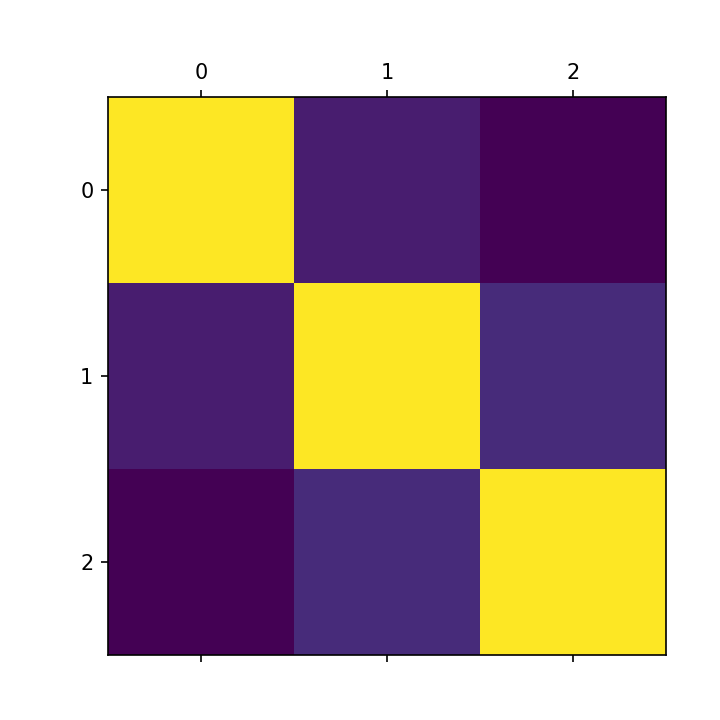

In [12]:
# correlation map for fun

plt.matshow(house_df.corr())
plt.show()